In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits import mplot3d
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import cross_val_predict

In [2]:
ds = pd.read_csv(
    '/Users/lemon/Documents/Uni/4° semestre/Machine Learning/Individual Assignment /mldata_0003085366/mldata_0003085366.csv')

In [3]:
ds.head

<bound method NDFrame.head of      Unnamed: 0  label  feature_1  feature_2  feature_3  feature_4  feature_5  \
0             0      0  -1.327967   2.226643   0.499780   1.894504  -0.188533   
1             1      0   3.026139  -3.406195   3.136836  -1.713195   2.301741   
2             2      1   2.977000  -2.665583   5.174346  -2.808640  -0.439277   
3             3      0  -0.723351  -2.019493   0.037144  -0.654626   0.009609   
4             4      1  -0.207231   0.314772   0.295511  -0.565875  -1.605924   
..          ...    ...        ...        ...        ...        ...        ...   
995         995      0   0.135800  -0.579174   1.598336   1.068122   0.882236   
996         996      0   0.271840   1.817276   0.128035   1.587401   1.192136   
997         997      1  -0.158813  -1.190487   1.764924   0.152657   0.759236   
998         998      1   1.067859  -3.002865   3.230127  -2.652552   1.799643   
999         999      1  -4.013801  -0.088568  -1.485215   0.751078  -0.904364  

# Preparing the data

In [4]:
# We are looking for missing features
sample_incomplete_rows = ds[ds.isnull().any(axis=1)].head()
sample_incomplete_rows.size

0

There are no missing feature

In [5]:
#dealing with categorical features using OneHotEncoding
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder(sparse = False)
ds_cat = ds[['categorical_feature_1']]
ds_cat_encoded = onehot_encoder.fit_transform(ds_cat)
ds_cat_encoded = pd.DataFrame(ds_cat_encoded, columns = ['Column_A','Column_B'])
ds_prepared = (pd.concat([ds, ds_cat_encoded], axis = 1)).drop(columns = 'categorical_feature_1')
ds_prepared.head()

,Unnamed: 0,label,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,...,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,Column_A,Column_B
0,0,0,-1.327967,2.226643,0.499780,1.894504,-0.188533,2.396184,3.470134,2.779021,...,1.378071,-0.582578,1.298956,-2.575153,0.475875,0.495066,0.532443,-1.135619,1.0,0.0
1,1,0,3.026139,-3.406195,3.136836,-1.713195,2.301741,-3.352438,-0.172244,-1.318738,...,-0.790346,-0.684661,-1.366242,-1.763793,2.477121,-0.815971,0.657667,-1.411349,1.0,0.0
2,2,1,2.977000,-2.665583,5.174346,-2.808640,-0.439277,-3.556240,-3.866833,-0.749283,...,-0.511821,1.677333,-2.604761,-0.936410,1.869575,0.590800,5.797289,3.452891,1.0,0.0
3,3,0,-0.723351,-2.019493,0.037144,-0.654626,0.009609,-2.264579,-0.025529,0.341326,...,-2.800842,1.342721,0.105007,-1.578888,0.849746,-0.663637,0.567260,-2.780462,1.0,0.0
4,4,1,-0.207231,0.314772,0.295511,-0.565875,-1.605924,-1.516952,-3.763485,-0.065781,...,-2.453111,1.267401,1.447957,1.549992,0.567681,0.810901,-0.627588,0.937645,0.0,1.0


In [6]:
#we are looking at the data
ds.describe()
corr_matrix = ds_prepared.drop(columns = 'Unnamed: 0').corr()
corr_matrix["label"].sort_values(ascending=False)

label         1.000000
feature_11    0.184832
feature_16    0.180520
Column_B      0.169311
feature_10    0.148899
feature_3     0.138873
feature_19    0.098932
feature_5     0.081115
feature_20    0.022516
feature_1    -0.020059
feature_14   -0.144535
feature_12   -0.150689
feature_9    -0.150728
Column_A     -0.169311
feature_18   -0.197428
feature_17   -0.206888
feature_6    -0.211594
feature_7    -0.213316
feature_15   -0.236897
feature_13   -0.278904
feature_2    -0.295104
feature_8    -0.364267
feature_4    -0.400583
Name: label, dtype: float64

In [7]:
#separating features and targets
X = ds_prepared.drop(columns = ['Unnamed: 0','label'])
y = ds['label']

In [8]:
#train, test split
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 42)

In [9]:
#we are going to use the scaled data only for logistic regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Data Visualization

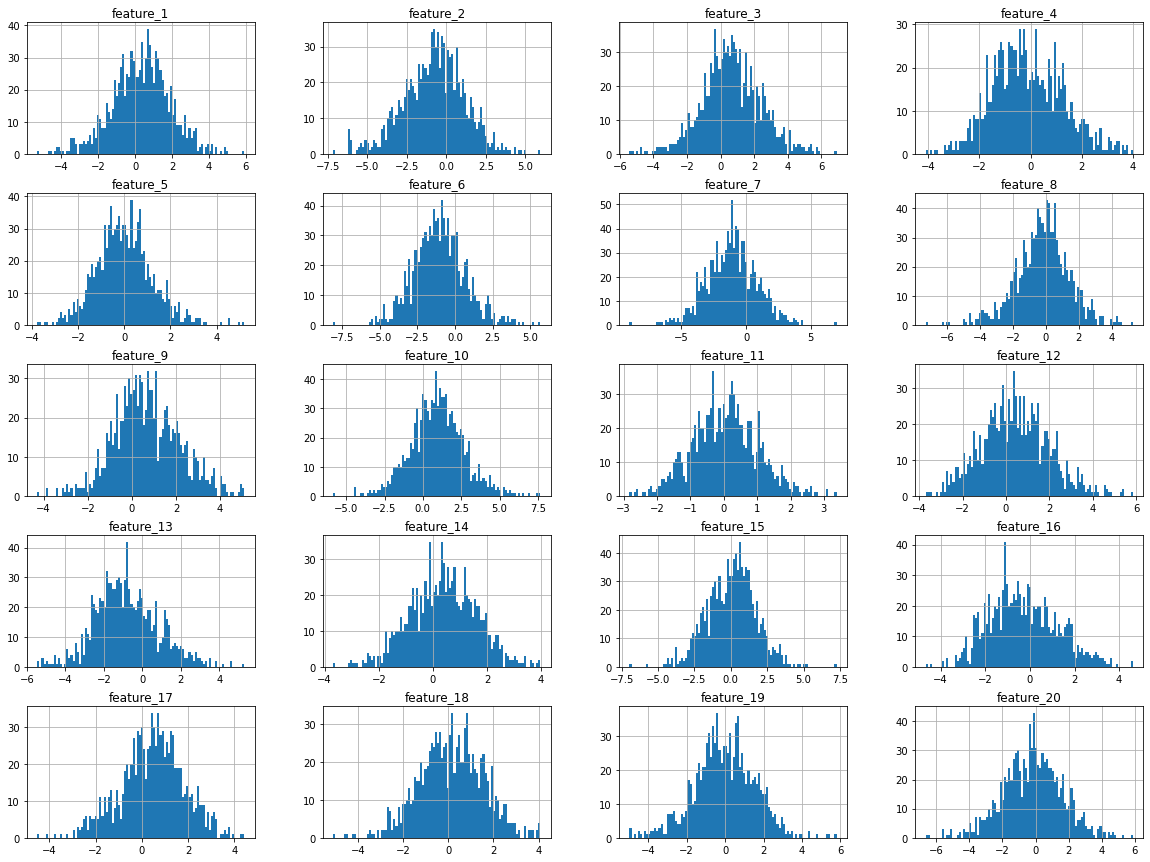

In [10]:
%matplotlib inline
X.drop(columns =['Column_A', 'Column_B']).hist(bins=100, figsize=(20,15))
plt.show()

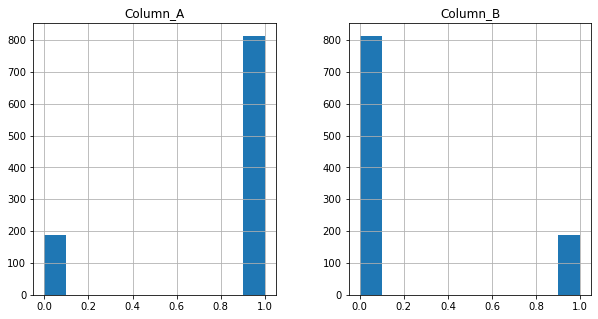

In [11]:
%matplotlib inline
ds_cat_encoded.hist(bins=10, figsize=(10,5))
plt.show()

In [12]:
#Applying PCA for data visualization
pca = PCA(2)
X_train_pca = pca.fit_transform(X_train)

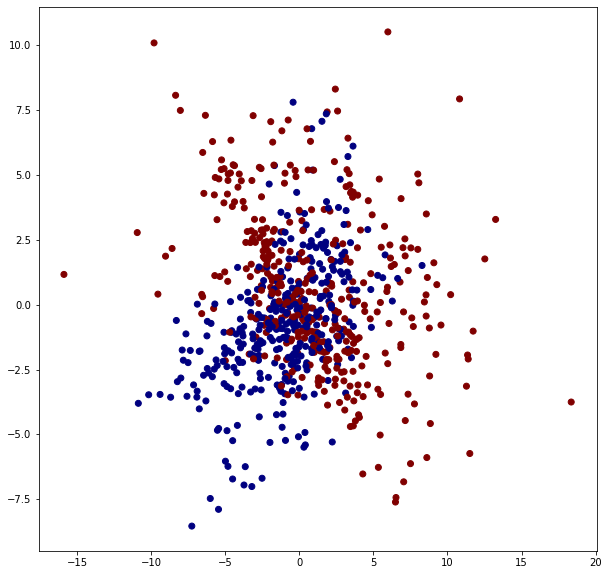

In [13]:
#Visualizing PCA(2)
plt.figure(figsize=(10,10))
plt.set_cmap('jet')
plt.scatter(X_train_pca[:,0], X_train_pca[:,1], alpha=1, c=y_train)

In [14]:
#PCA 3D
pca = PCA(3)
X_train_pca = pca.fit_transform(X_train)


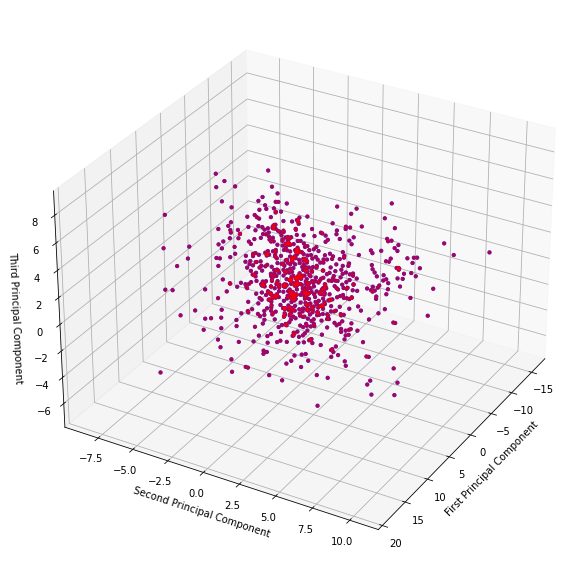

In [15]:
#Visualizing PCA(3)
Xax = X_train_pca[:,0]
Yax = X_train_pca[:,1]
Zax = X_train_pca[:,2]

cdict = {0:'blue',1:'red'}
alpha = {0:0.9, 1:0.5}

fig = plt.figure(figsize=(10,20))
ax = fig.add_subplot(111, projection='3d')

fig.patch.set_facecolor('white')
for l in np.unique(y):
 ix=range(750)
 ax.scatter(Xax[ix], Yax[ix], Zax[ix], c=cdict[l], s=10,
            alpha=alpha[l])


ax.set_xlabel("First Principal Component", fontsize=10)
ax.set_ylabel("Second Principal Component", fontsize=10)
ax.set_zlabel("Third Principal Component", fontsize=10)

ax.view_init(30, 30)
plt.show()

It seems like PCA in 2 and 3 dimensions doesn't contain enough information for a good classification.
Thus I will not rely on PCA for the given data set

# Training Random Forest

In [16]:
min_score = -np.inf
l = np.linspace(100,1000,10, dtype='int64')
k = np.linspace(10,100,10, dtype = 'int64')
for max_leaf_nodes in k:
    for n_estimators in l:
        rnd_clf = RandomForestClassifier( n_estimators = n_estimators, max_leaf_nodes = max_leaf_nodes , n_jobs = -1, random_state = 42)
        scores = cross_val_score(rnd_clf, X_train, y_train,
                                 scoring="accuracy", cv=5)
        if scores.mean() >= min_score:
            max_leaf_nodes_best = max_leaf_nodes
            n_estimators_best = n_estimators
            min_score = scores.mean()

        print("max_leaf_nodes: {} n_estimators: {} Score: {} STD: {}".format(
            max_leaf_nodes, n_estimators ,  np.mean(scores), scores.std()))

print(f" max_leaf_nodes_best = {max_leaf_nodes_best} , n_estimators_best = {n_estimators_best}")

rnd_clf = RandomForestClassifier( n_estimators = n_estimators_best , max_leaf_nodes = max_leaf_nodes_best , n_jobs = -1, random_state = 42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

max_leaf_nodes: 10 n_estimators: 100 Score: 0.7986666666666667 STD: 0.019955506062794354
max_leaf_nodes: 10 n_estimators: 200 Score: 0.8013333333333333 STD: 0.024367555843329426
max_leaf_nodes: 10 n_estimators: 300 Score: 0.8013333333333332 STD: 0.019955506062794354
max_leaf_nodes: 10 n_estimators: 400 Score: 0.8039999999999999 STD: 0.019136933459209755
max_leaf_nodes: 10 n_estimators: 500 Score: 0.8066666666666666 STD: 0.020221001184137468
max_leaf_nodes: 10 n_estimators: 600 Score: 0.8053333333333335 STD: 0.018571184369578813
max_leaf_nodes: 10 n_estimators: 700 Score: 0.8039999999999999 STD: 0.019136933459209755
max_leaf_nodes: 10 n_estimators: 800 Score: 0.8026666666666668 STD: 0.017688665548562115
max_leaf_nodes: 10 n_estimators: 900 Score: 0.8039999999999999 STD: 0.019136933459209755
max_leaf_nodes: 10 n_estimators: 1000 Score: 0.8026666666666668 STD: 0.017688665548562115
max_leaf_nodes: 20 n_estimators: 100 Score: 0.82 STD: 0.019776529298921746
max_leaf_nodes: 20 n_estimators: 2

In [17]:
#Evaluating the model performance
rnd_clf = RandomForestClassifier( n_estimators = n_estimators_best , max_leaf_nodes = max_leaf_nodes_best , n_jobs = -1, random_state = 42)
rnd_clf.fit(X_train, y_train)
y_pred_rf = rnd_clf.predict(X_test)

from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred_rf))
print(f'Random Forest accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'Random Forest recall: {recall_score(y_test, y_pred_rf)}')

[[106  28]
 [ 18  98]]
Random Forest accuracy: 0.816
Random Forest recall: 0.8448275862068966


# Training Logistic Regression

In [18]:
log_reg = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = np.linspace(0,1,11)

grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=log_reg, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train_scaled, y_train)


means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))
    
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

0.000000 (0.000000) with: {'C': 0.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.000000 (0.000000) with: {'C': 0.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.000000 (0.000000) with: {'C': 0.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.732444 (0.038480) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.732444 (0.038480) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.730667 (0.038165) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.731111 (0.038771) with: {'C': 0.2, 'penalty': 'l2', 'solver': 'newton-cg'}
0.731111 (0.038771) with: {'C': 0.2, 'penalty': 'l2', 'solver': 'lbfgs'}
0.731111 (0.039678) with: {'C': 0.2, 'penalty': 'l2', 'solver': 'liblinear'}
0.730222 (0.038480) with: {'C': 0.30000000000000004, 'penalty': 'l2', 'solver': 'newton-cg'}
0.730222 (0.038480) with: {'C': 0.30000000000000004, 'penalty': 'l2', 'solver': 'lbfgs'}
0.730667 (0.039911) with: {'C': 0.30000000000000004, 'penalty': 'l2', 'solver': 'liblinear'}
0.730222 (0.038633) with: {'C': 0.4, 'penalt

In [19]:
#Evaluating the model

log_reg = LogisticRegression(penalty = 'l2', C= 0.1, solver = 'newton-cg')
log_reg.fit(X_train_scaled, y_train)
y_pred_lr = log_reg.predict(X_test_scaled)

print(confusion_matrix(y_test, y_pred_lr))
print(f'Logistic Regression accuracy: {accuracy_score(y_test, y_pred_lr)}')
print(f'Logistic Regression recall: {recall_score(y_test, y_pred_lr)}')

[[97 37]
 [35 81]]
Logistic Regression accuracy: 0.712
Logistic Regression recall: 0.6982758620689655


# Comparing the 2 models

In [20]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.metrics import f1_score
from numpy import arange
from numpy import argmax

lr_probs = rnd_clf.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_probs_lr = log_reg.predict_proba(X_test)
lr_probs_lr = lr_probs_lr[:,1]
ns_probs = [0 for _ in range(len(y_test))]
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
ns_auc_lr = roc_auc_score(y_test, ns_probs)
lr_auc_lr = roc_auc_score(y_test, lr_probs_lr)
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_probs)
precisions_lr, recalls_lr, thresholds_lr = precision_recall_curve(y_test, lr_probs_lr)

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.795
Random Forest: ROC AUC=0.916


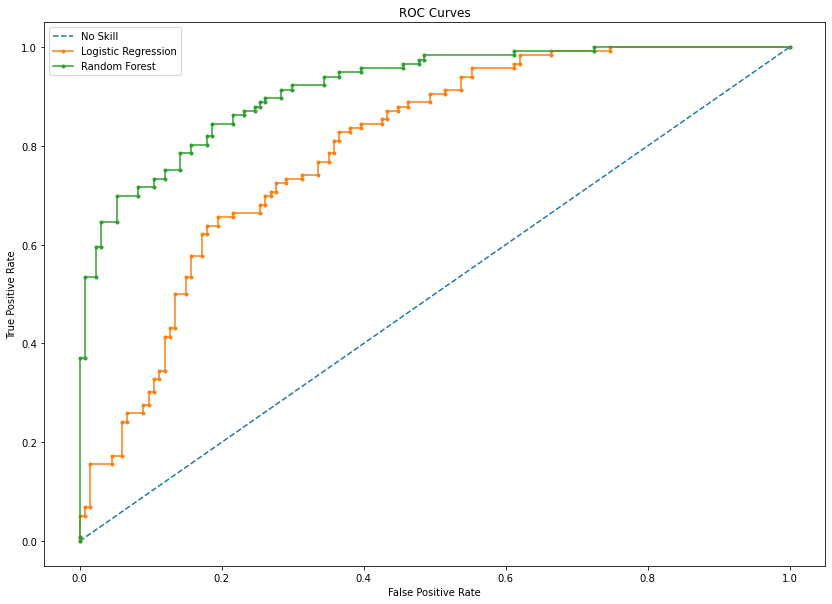

In [21]:
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc_lr))
print('Random Forest: ROC AUC=%.3f' % (lr_auc))
ns_fpr_lr, ns_tpr_lr, _ = roc_curve(y_test, ns_probs)
lr_fpr_lr, lr_tpr_lr, _ = roc_curve(y_test, lr_probs_lr)
plt.figure(figsize=(14, 10))
pyplot.plot(ns_fpr_lr, ns_tpr_lr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr_lr, lr_tpr_lr, marker='.', label='Logistic Regression')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
plt.title("ROC Curves")
pyplot.legend()
pyplot.show()

The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
Since the AUC ROC score for Random forest is higher than that of Logistic regression, we can confortably say that in this case Random Forest is better than Logistic regression in classifing the data points of the given data set.

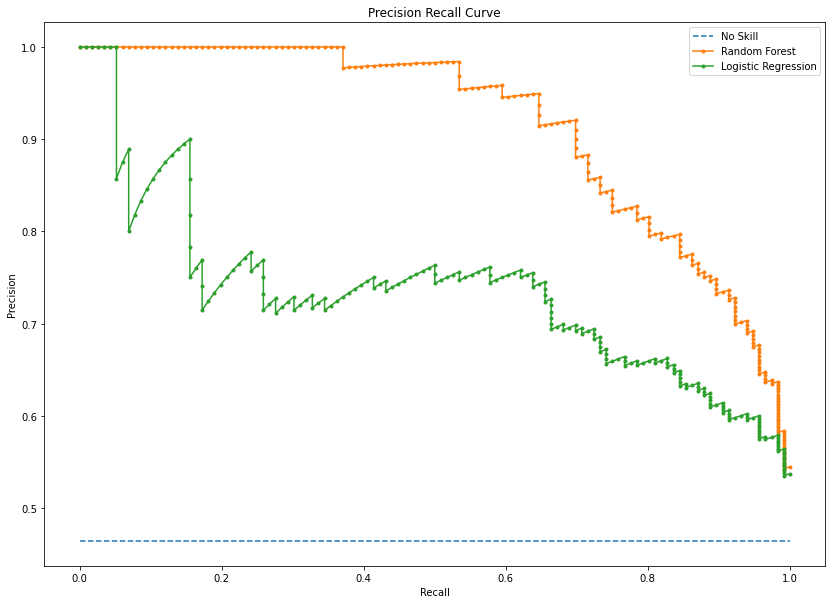

In [22]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc

plt.figure(figsize=(14, 10))

lr_precision, lr_recall, _ = precision_recall_curve(y_test, lr_probs)
yhat = rnd_clf.predict(X_test)
lr_f1, lr_auc = f1_score(y_test, yhat), auc(lr_recall, lr_precision)

lr_precision_lr, lr_recall_lr, _ = precision_recall_curve(y_test, lr_probs_lr)
yhat_lr = log_reg.predict(X_test)
lr_f1_lr, lr_auc_lr = f1_score(y_test, yhat_lr), auc(lr_recall_lr, lr_precision_lr)


no_skill = len(y_test[y_test==1]) / len(y_test)

pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='Random Forest')
pyplot.plot(lr_recall_lr, lr_precision_lr, marker='.', label='Logistic Regression')
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
plt.title("Precision Recall Curve")
pyplot.legend()
pyplot.show()

The precision-recall curve shows the tradeoff between precision and recall for different threshold.
\
Precision and recall have an inverse relatioship: as precision increases, recalls tends to decrease (and vice versa)\
From the above graph we can see that the inverse relationship between precision and recall for Random Forest is 'less strong' than that of Logistic Regression: as precision increses, recall decreases more (in relative terms) in Logistic Regression than in Random Forest


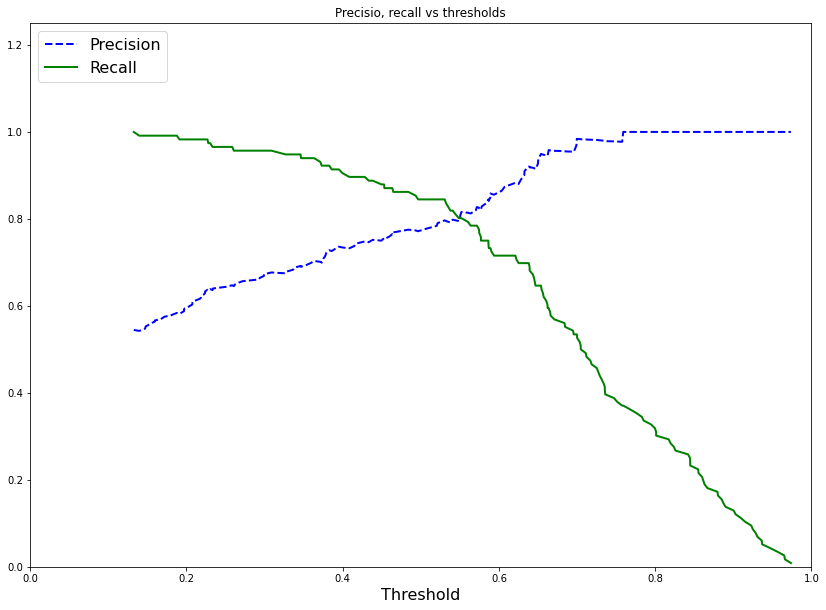

In [23]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1.25])
    
precisions, recalls, thresholds = precision_recall_curve(y_test, lr_probs)

plt.figure(figsize=(14, 10))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.xlim([0, 1])
plt.title("Precisio, recall vs thresholds")
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

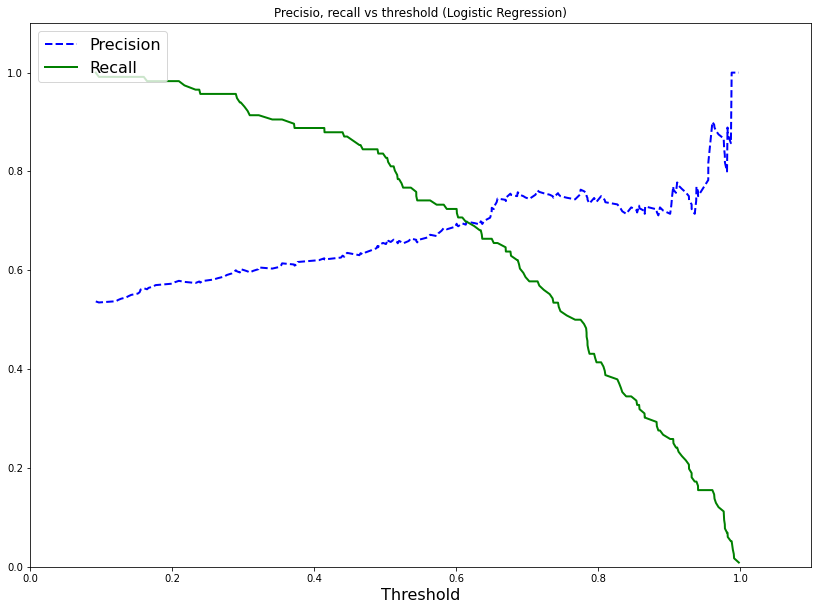

In [24]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.xlabel("Threshold", fontsize=16)
    plt.legend(loc="upper left", fontsize=16)
    plt.ylim([0, 1.1])

plt.figure(figsize=(14, 10))
plot_precision_recall_vs_threshold(precisions_lr, recalls_lr, thresholds_lr)
plt.xlim([0, 1.1])
plt.title("Precisio, recall vs threshold (Logistic Regression)")
#save_fig("precision_recall_vs_threshold_plot")
plt.show()

# Conclusions

The best model for the given classification problem is Random Forest.
These are the reasons why:
1) Random Forest achieves higher accuracy and recall \
Random Forest accuracy: 0.816  vs Logistic Regression accuracy: 0.712 \
Random Forest recall: 0.845 vs Logistic Regression recall: 0.698

2) Random Forest has a higher ROC AUC, meaning that the Random Forest model is better at distinguishing between the positive and negative classes
Random Forest: ROC AUC=0.916 vs Logistic: ROC AUC=0.792

3) The precision-recall curve shows the tradeoff between precision and recall of the random forest model is lower than that of Logistic Regression model. 
Meaning that as precision increses, recall decreases less (in relative terms) in Random Forest than in Logistic Regression



Hyperparameter tuning for random forest yelded the following set of parameters: 
max_leaf_nodes_best = 90 , n_estimators_best = 900

In [25]:
max_leaf_nodes_best, n_estimators_best

(90, 900)

The final model is the following:

In [26]:
rnd_clf = RandomForestClassifier( n_estimators = n_estimators_best , max_leaf_nodes = max_leaf_nodes_best , n_jobs = -1, random_state = 42)
rnd_clf.fit(X_train, y_train)

RandomForestClassifier(max_leaf_nodes=90, n_estimators=900, n_jobs=-1,
                       random_state=42)

The final predictions are:

In [27]:
y_pred_rf = rnd_clf.predict(X_test)
y_pred_rf

array([1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 1])

The final performance is:

In [28]:
print(confusion_matrix(y_test, y_pred_rf))
print(f'Random Forest accuracy: {accuracy_score(y_test, y_pred_rf)}')
print(f'Random Forest recall: {recall_score(y_test, y_pred_rf)}')

[[106  28]
 [ 18  98]]
Random Forest accuracy: 0.816
Random Forest recall: 0.8448275862068966
